### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.text import TSNEVisualizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Datasets

In [2]:
X_Train = np.array([[1.3, 3.3], 
                    [1.4, 2.5],
                    [1.8, 2.8], 
                    [1.9, 3.1], 
                    [1.5, 1.5],
                    [1.8, 2], 
                    [2.3, 1.9], 
                    [2.4, 1.4], 
                    [2.4, 2.4],
                    [2.4, 3], 
                    [2.7, 2.7], 
                    [2.3, 3.2]])

y_Train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

X_Test = np.array([[1.7, 2.5], 
                   [1.9, 2.7], 
                   [2, 2.15],
                   [2.4, 2],
                   [2.2, 3.25], 
                   [2.4, 2.25]])

y_Test = np.array([0, 0, 1, 1, 2, 2])

## Constant

In [3]:
colors = ['blue', 'red', 'orange']

In [4]:
def define_marker (x_tr,y_train , x_test,y_test):
    
    unique_values = np.unique(y_train)
    
    for i, color in zip(range(0,len(unique_values)), colors):
        idx = np.where(y_train == i)
        plt.scatter(x_tr[idx, 0], x_tr[idx, 1], c=color, label='Class ' + str(i), edgecolors='black', marker='o')

    for i, color in zip(range(0,len(unique_values)), colors):
        idx = np.where(y_test == i)
        plt.scatter(x_test[idx, 0], x_test[idx, 1], c=color, label='Class ' + str(i) + ' (Test)', edgecolors='black', marker='x')





### Draw scatter plot to show my data before processing

In [5]:
def classify_Three_classes():
    
    plt.rcParams['figure.figsize'] = (12, 8)
    define_marker(X_Train,y_Train,X_Test,y_Test)
    plt.xlabel('X_axis')
    plt.ylabel('Y_axis')
    plt.title('Classifiy Three classes')
    plt.legend(frameon=True)
    
    plt.show()

C:\Users\DEBI\AppData\Local\Temp\ipykernel_11960\1601434719.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[idx, 0], x_test[idx, 1], c=color, label='Class ' + str(i) + ' (Test)', edgecolors='black', marker='x')


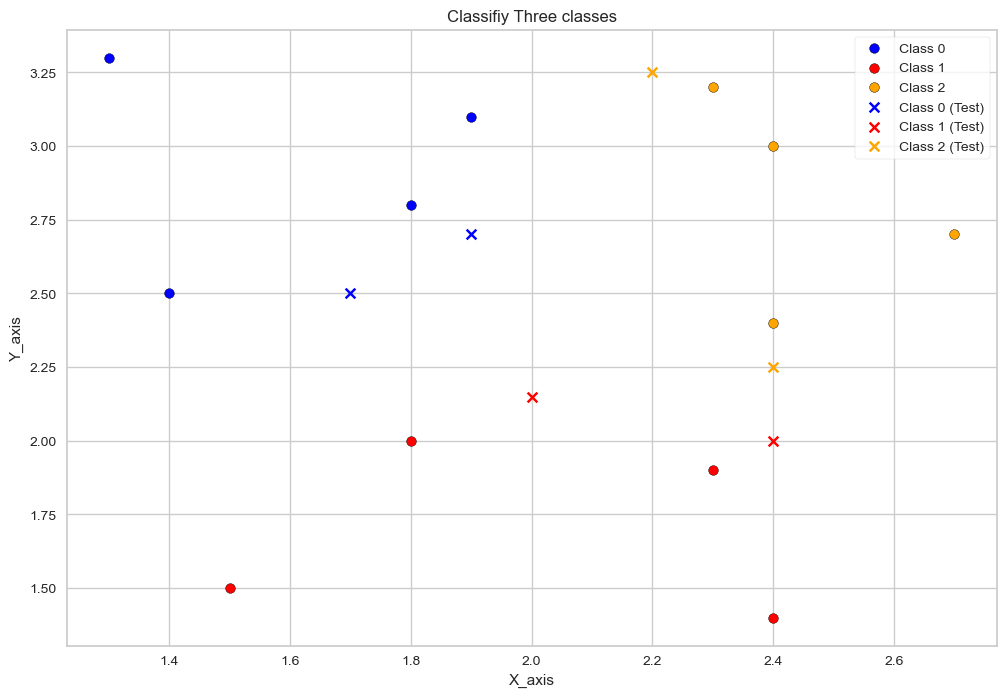

In [6]:
classify_Three_classes()

### Function conf_matrix 
* To preview the confusion matrix and classification report 

In [7]:
def conf_matrix (x,y,title,show_report=False):
    cm = confusion_matrix(x, y)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=[ 'grey','black'], cbar=False)
    plt.title(f'Confusion Matrix - {title} Data')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()
    if not show_report:
        print("Accuracy: ", accuracy_score(x, y))
   
    if show_report:
        report = classification_report(x, y)
        print("Classification Report:")
        print(report)
        plt.show()

###  Default SVM classifier

In [8]:
Default_classifier = SVC()
Default_classifier.fit(X_Train, y_Train)

y_Pred_test = Default_classifier.predict(X_Test)
y_pred_train = Default_classifier.predict(X_Train)

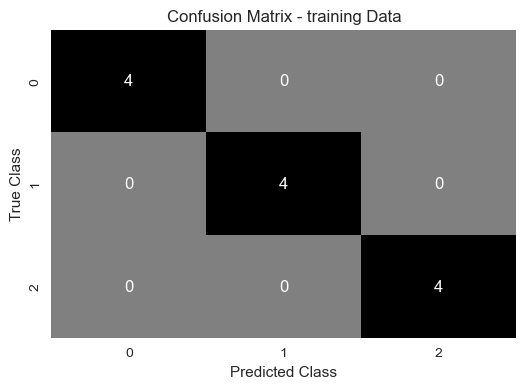

Accuracy:  1.0


In [9]:
conf_matrix(y_Train, y_pred_train,"training")

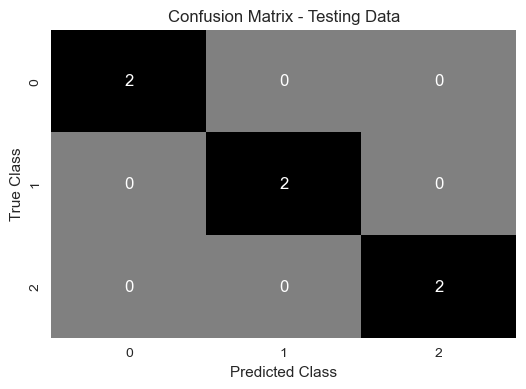

Accuracy:  1.0


In [10]:
y_pred = Default_classifier.predict(X_Test)
conf_matrix(y_Test, y_pred,"Testing")


### Function plot_decision_boundary_All_data 
* Draw three 

In [11]:
def plot_decision_boundary_All_data(models, X_train, y_train,X_test,y_test,title,lb=None ):
    

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    h = 0.02  

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    if len(models) > 1:
        stacked_predictions = np.vstack([model.predict(np.c_[xx.ravel(), yy.ravel()]) for model in models])
        Z = np.argmax(stacked_predictions, axis=0)
        Z = Z.reshape(xx.shape)

    else:
       
        Z =  models[0].predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

  
    plt.contourf(xx, yy, Z,levels=[-.5,.1,1.5,3], colors=colors, alpha=0.3)
    plt.contour(xx, yy, Z, levels=1, colors='black', linewidths=2)
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    
    define_marker(X_train,y_train,X_test,y_test)


    plt.title(title)
    plt.legend(frameon=True)
    plt.show()

### SVM Default Decision Surface

C:\Users\DEBI\AppData\Local\Temp\ipykernel_11960\1601434719.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[idx, 0], x_test[idx, 1], c=color, label='Class ' + str(i) + ' (Test)', edgecolors='black', marker='x')


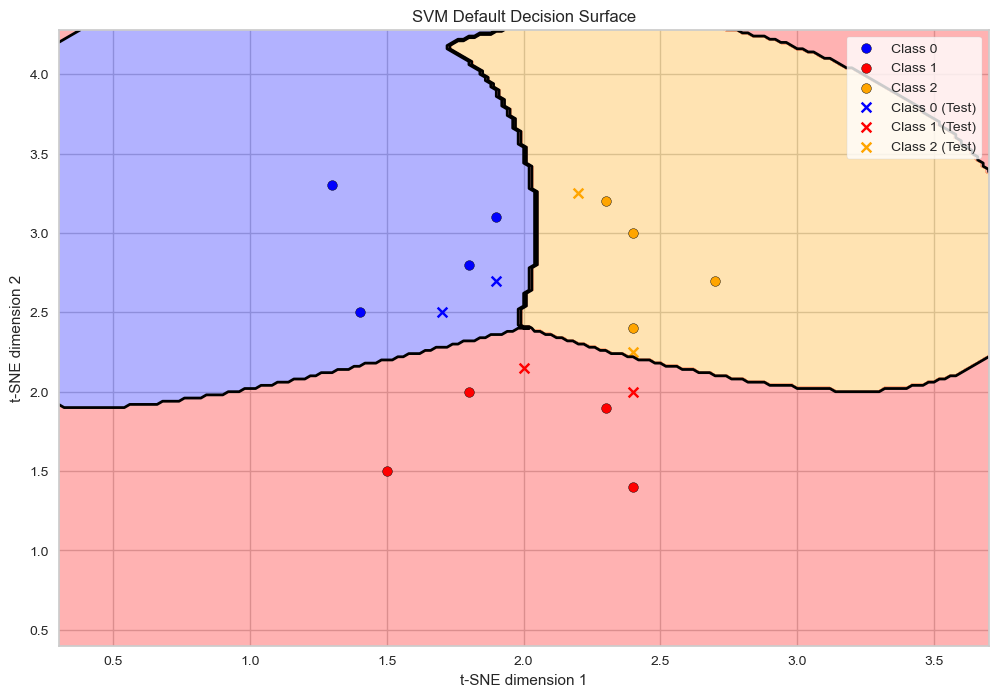

In [12]:
plot_decision_boundary_All_data([Default_classifier],X_Train,y_Train,X_Test,y_Test, 'SVM Default Decision Surface')

# SVM one-vs-all classifier

### Function binary_classification 
* convert three classes to two classes 

In [13]:
def binary_classification (Y_train):

        y_binary0 =np.where((Y_train == 1) | (Y_train == 2), 0, 1)
        y_binary1 =np.where((Y_train == 0) | (Y_train == 2), 0, 1)
        y_binary2 =np.where((Y_train == 0) | (Y_train == 1), 0, 1)
       
        
        return y_binary0,y_binary1,y_binary2
    


### Function_Vs_rest 
* To classifay each class with other two classes 

In [14]:
def One_Vs_rest(X_Train,Y_tain,X_test,Y_test,class_num,model):
    yTrain_binary=binary_classification(Y_tain)[class_num]
    yTest_binary=binary_classification(Y_test)[class_num]

    
    
        
    model=model.fit(X_Train, yTrain_binary)
    y_Train_pred = model.predict(X_Train)  
    y_pred = model.predict(X_Test)
    
    conf_matrix(yTrain_binary, y_Train_pred,"Training")
    
    conf_matrix(yTest_binary, y_pred,"Testing")
    
    
    
    return y_Train_pred,y_pred,model


### run One_Vs_rest fOR eash two classes

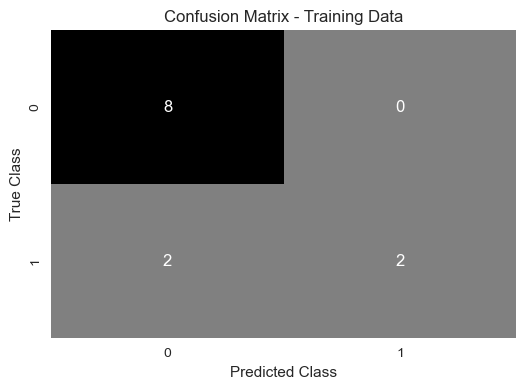

Accuracy:  0.8333333333333334


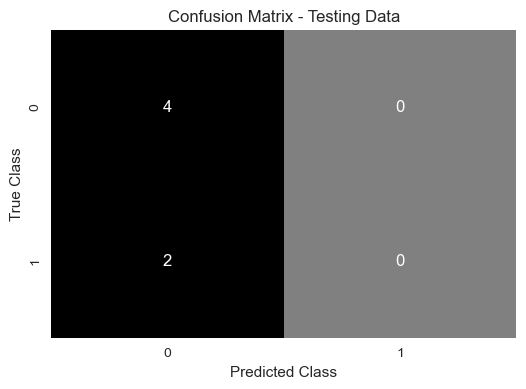

Accuracy:  0.6666666666666666


In [15]:
train_0,test_0,model_0 = One_Vs_rest(X_Train,y_Train,X_Test,y_Test,0,SVC(kernel='linear'))


C:\Users\DEBI\AppData\Local\Temp\ipykernel_11960\1601434719.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[idx, 0], x_test[idx, 1], c=color, label='Class ' + str(i) + ' (Test)', edgecolors='black', marker='x')


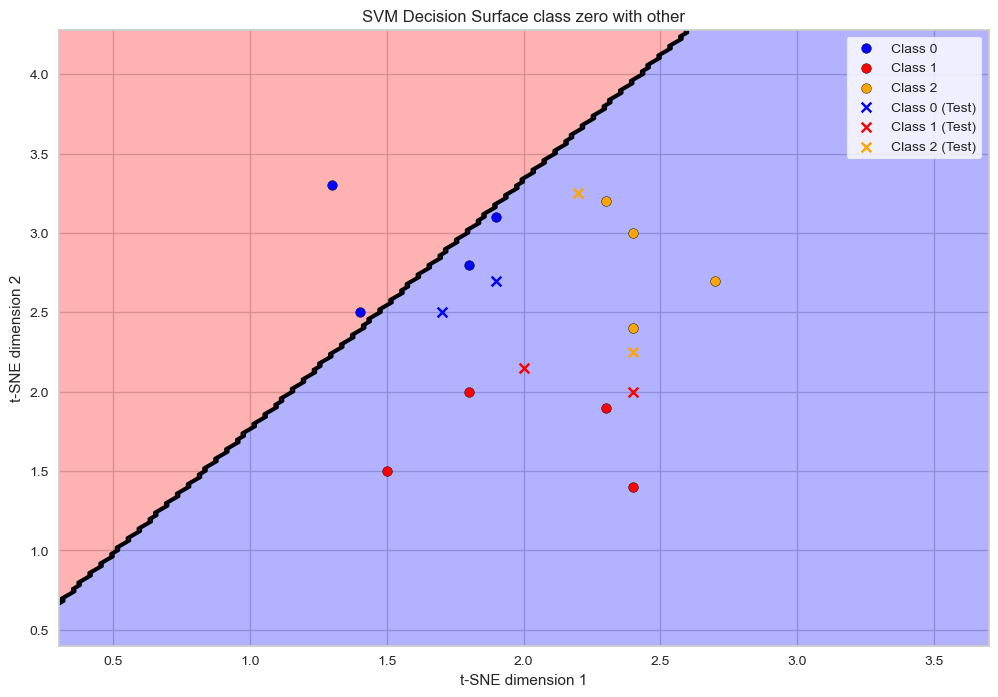

In [16]:
plot_decision_boundary_All_data([model_0],X_Train, y_Train,X_Test,y_Test,"SVM Decision Surface class zero with other")

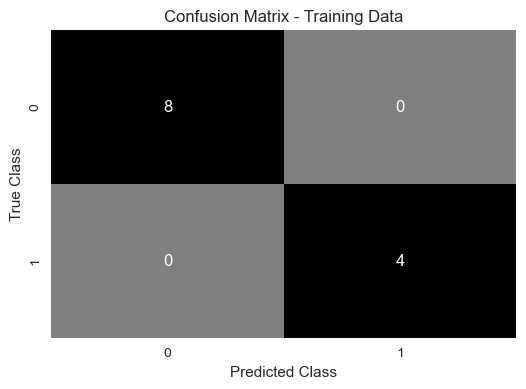

Accuracy:  1.0


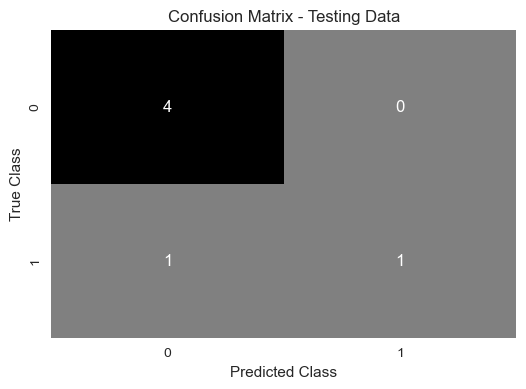

Accuracy:  0.8333333333333334


In [17]:
train_1,test_1,model_1=One_Vs_rest(X_Train,y_Train,X_Test,y_Test,1,SVC(kernel='linear'))

C:\Users\DEBI\AppData\Local\Temp\ipykernel_11960\1601434719.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[idx, 0], x_test[idx, 1], c=color, label='Class ' + str(i) + ' (Test)', edgecolors='black', marker='x')


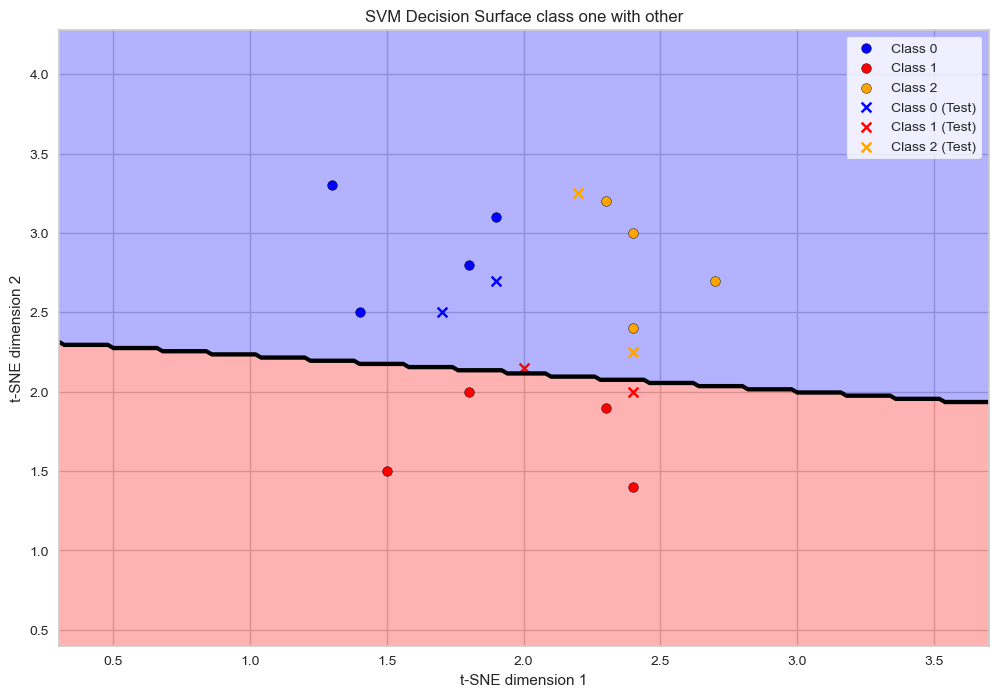

In [18]:
plot_decision_boundary_All_data([model_1],X_Train, y_Train,X_Test,y_Test,"SVM Decision Surface class one with other")

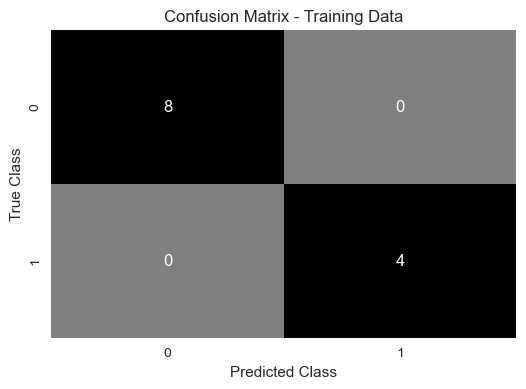

Accuracy:  1.0


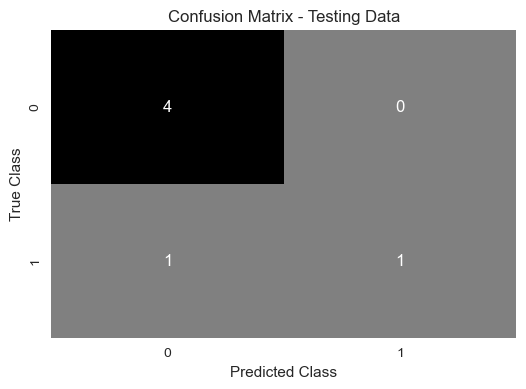

Accuracy:  0.8333333333333334


In [19]:
train_2,test_2,model_3=One_Vs_rest(X_Train,y_Train,X_Test,y_Test,2,SVC(kernel='linear'))

C:\Users\DEBI\AppData\Local\Temp\ipykernel_11960\1601434719.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[idx, 0], x_test[idx, 1], c=color, label='Class ' + str(i) + ' (Test)', edgecolors='black', marker='x')


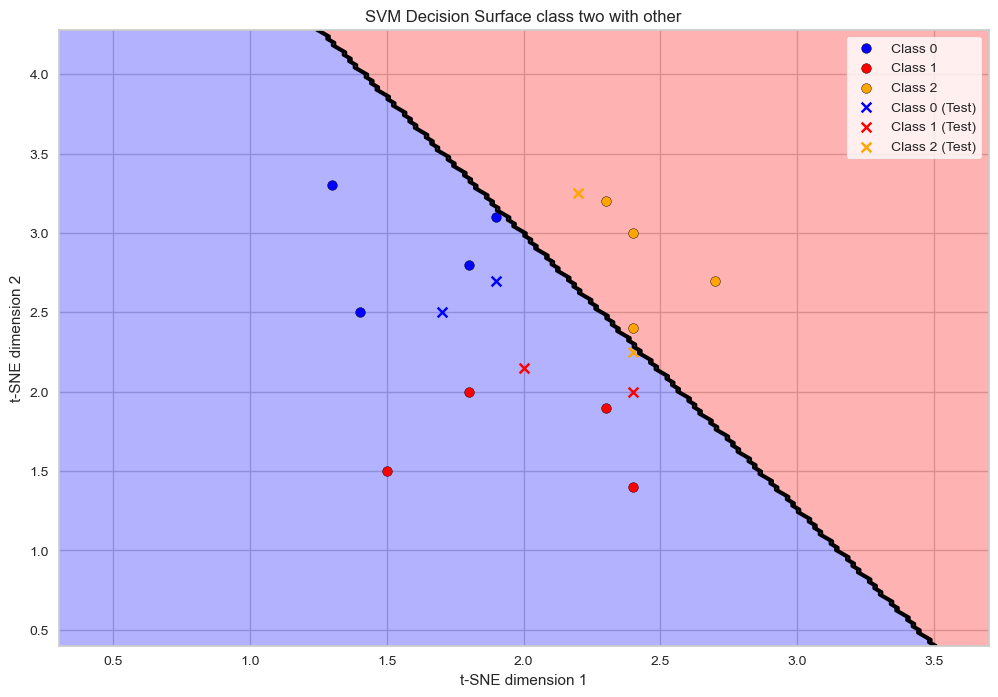

In [20]:
plot_decision_boundary_All_data([model_3],X_Train, y_Train,X_Test,y_Test,"SVM Decision Surface class two with other")

### Function concat 
* To aggregate three list

In [21]:
def concat(l1, l2, l3):
    combined_array = np.vstack((l1, l2, l3))
    result = np.argmax(combined_array, axis=0)
    return result

### Aggregate results from the one-vs-rest strategy for SVM

In [22]:
argmax_train=concat(train_0,train_1,train_2)
argmax_test=concat(test_0,test_1,test_2)

C:\Users\DEBI\AppData\Local\Temp\ipykernel_11960\1601434719.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[idx, 0], x_test[idx, 1], c=color, label='Class ' + str(i) + ' (Test)', edgecolors='black', marker='x')


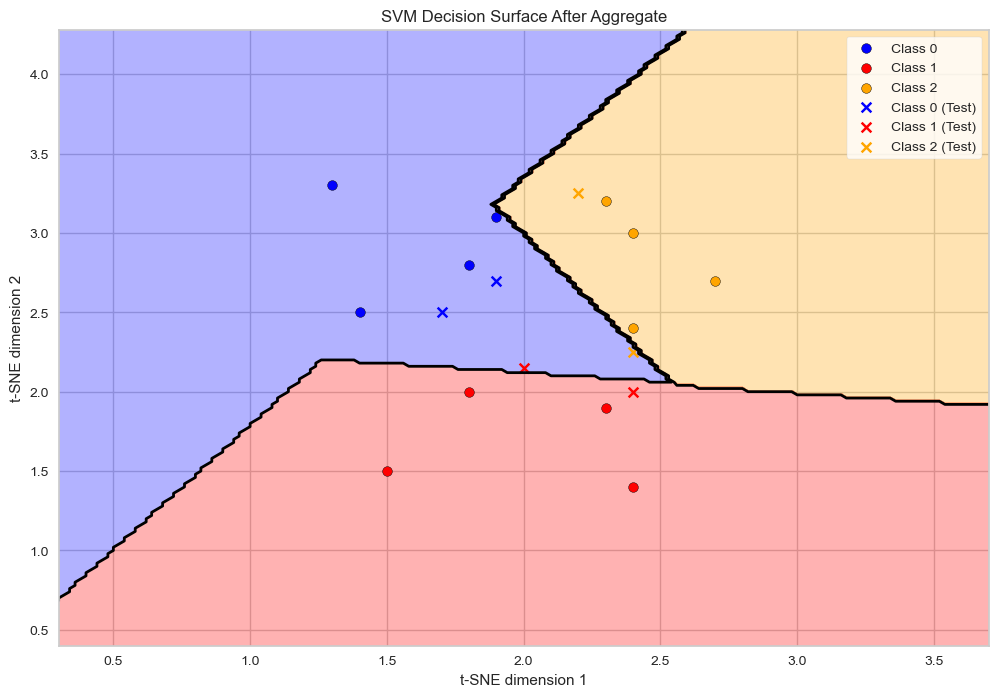

In [23]:
plot_decision_boundary_All_data([model_0,model_1,model_3],X_Train, y_Train,X_Test,y_Test,'SVM Decision Surface After Aggregate')


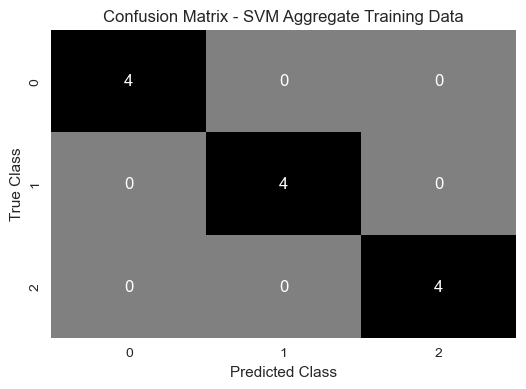

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [24]:
conf_matrix(y_Train, argmax_train,"SVM Aggregate Training",True)

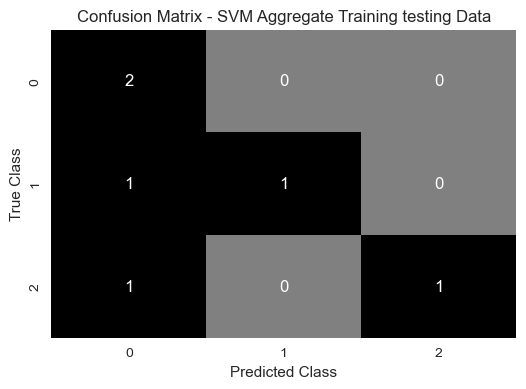

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         2
           2       1.00      0.50      0.67         2

    accuracy                           0.67         6
   macro avg       0.83      0.67      0.67         6
weighted avg       0.83      0.67      0.67         6



In [25]:
conf_matrix(y_Test, argmax_test,"SVM Aggregate Training testing",True)

## Perceptron
* perceptron with one_vs_rest

### run One_Vs_rest fOR eash two classes

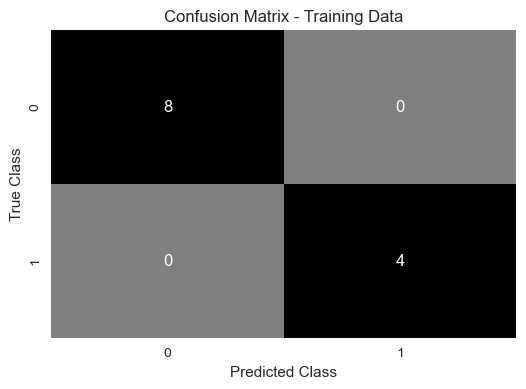

Accuracy:  1.0


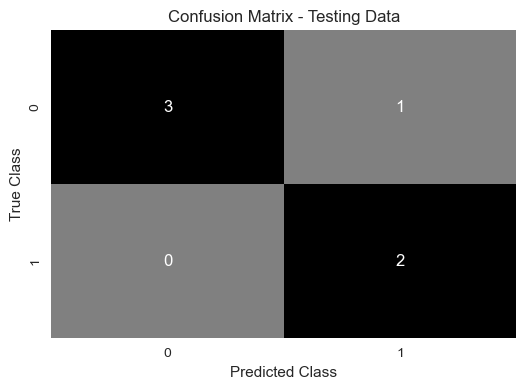

Accuracy:  0.8333333333333334


In [26]:
train_Per_0,test_Per_0,model_Per_0=One_Vs_rest(X_Train,y_Train,X_Test,y_Test,0,Perceptron())

C:\Users\DEBI\AppData\Local\Temp\ipykernel_11960\1601434719.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[idx, 0], x_test[idx, 1], c=color, label='Class ' + str(i) + ' (Test)', edgecolors='black', marker='x')


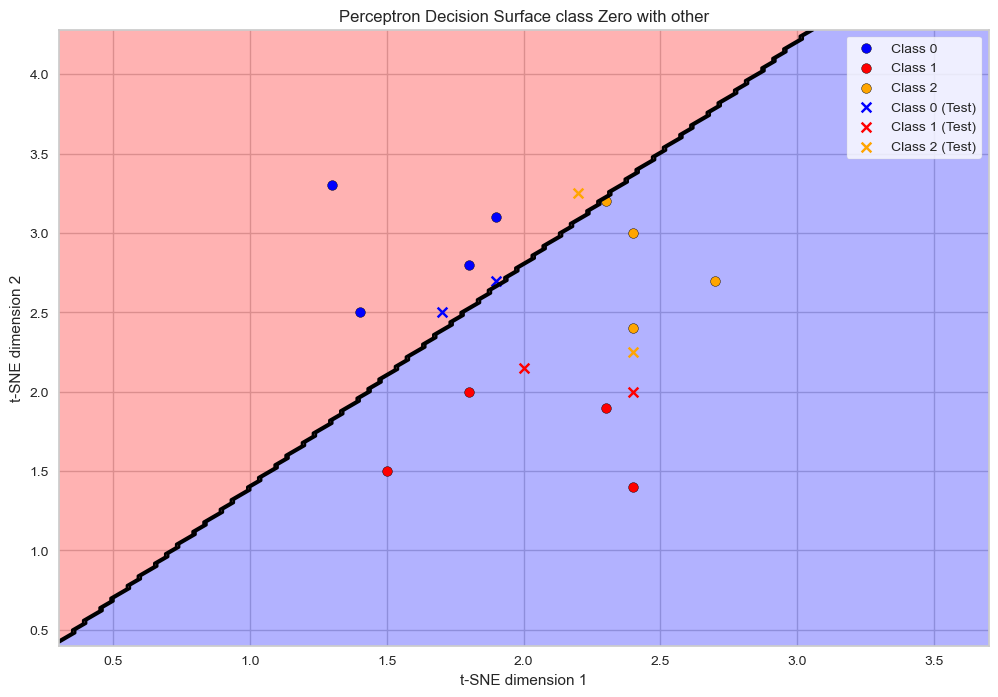

In [27]:
plot_decision_boundary_All_data([model_Per_0],X_Train, y_Train,X_Test,y_Test,"Perceptron Decision Surface class Zero with other")

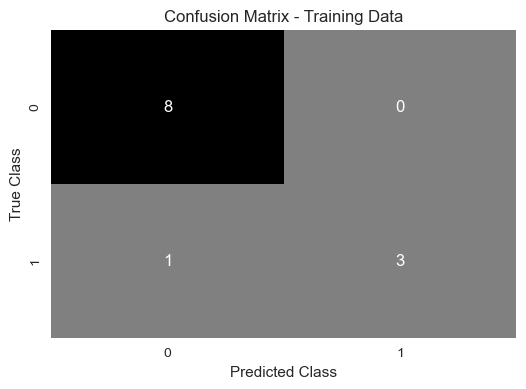

Accuracy:  0.9166666666666666


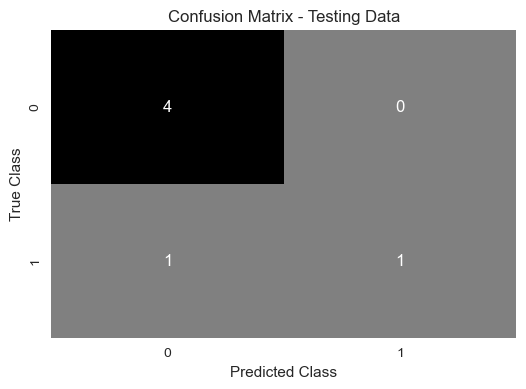

Accuracy:  0.8333333333333334


In [28]:
train_Per_1,test_Per_1,model_Per_1=One_Vs_rest(X_Train,y_Train,X_Test,y_Test,1,Perceptron())

C:\Users\DEBI\AppData\Local\Temp\ipykernel_11960\1601434719.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[idx, 0], x_test[idx, 1], c=color, label='Class ' + str(i) + ' (Test)', edgecolors='black', marker='x')


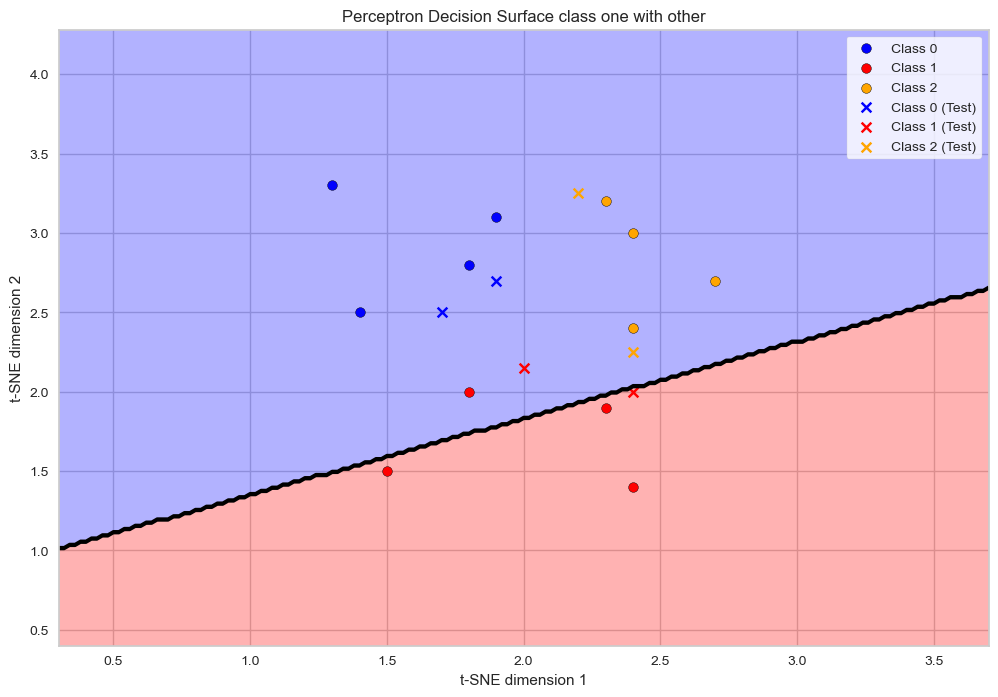

In [29]:
plot_decision_boundary_All_data([model_Per_1],X_Train, y_Train,X_Test,y_Test,"Perceptron Decision Surface class one with other")

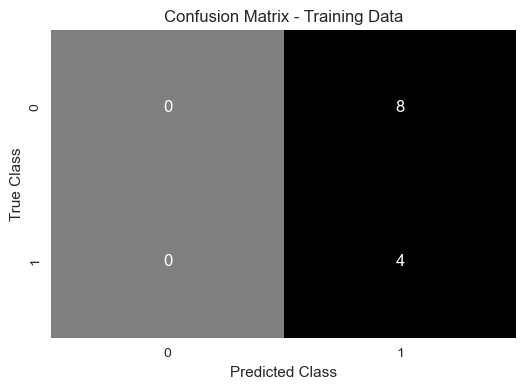

Accuracy:  0.3333333333333333


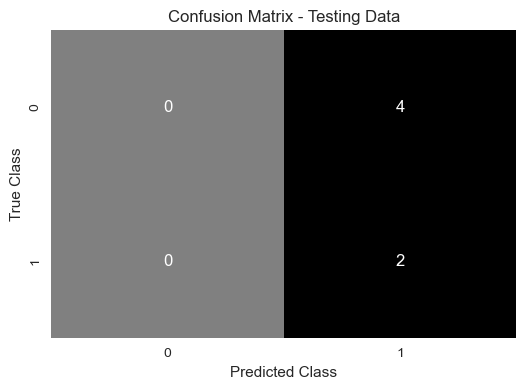

Accuracy:  0.3333333333333333


In [30]:
train_Per_2,test_Per_2,model_Per_3=One_Vs_rest(X_Train,y_Train,X_Test,y_Test,2,Perceptron())

C:\Users\DEBI\AppData\Local\Temp\ipykernel_11960\1601434719.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[idx, 0], x_test[idx, 1], c=color, label='Class ' + str(i) + ' (Test)', edgecolors='black', marker='x')


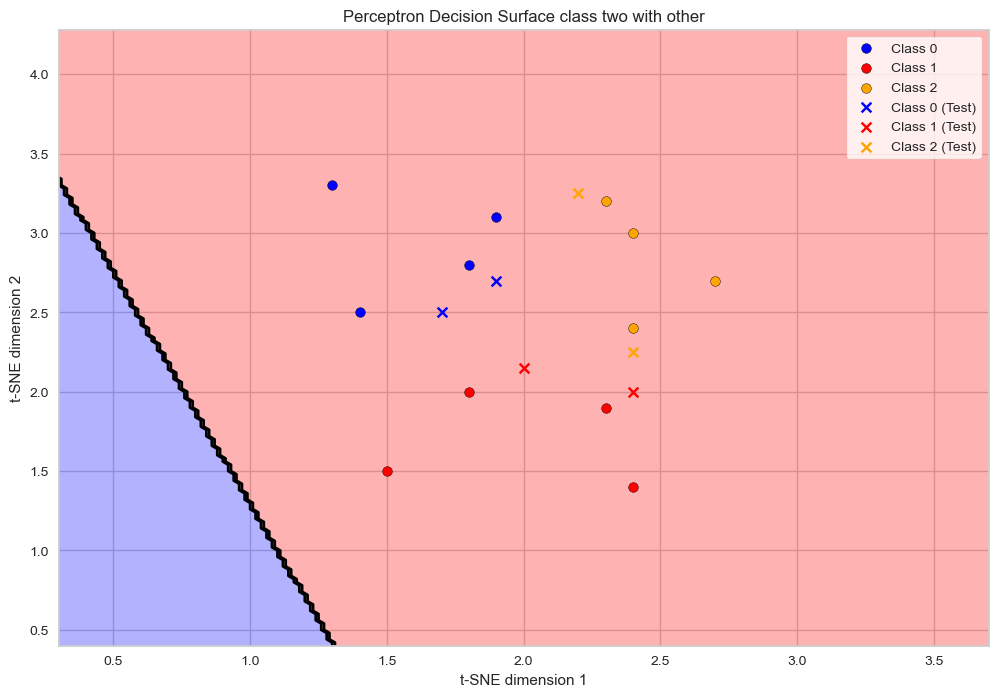

In [31]:
plot_decision_boundary_All_data([model_Per_3],X_Train, y_Train,X_Test,y_Test,"Perceptron Decision Surface class two with other")

### Aggregate results from the one-vs-rest strategy for perceptron

In [32]:

argmax_train_prc=concat(train_Per_0,train_Per_1,train_Per_2)
argmax_test_prc=concat(test_Per_0,test_Per_1,test_Per_2)


C:\Users\DEBI\AppData\Local\Temp\ipykernel_11960\1601434719.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[idx, 0], x_test[idx, 1], c=color, label='Class ' + str(i) + ' (Test)', edgecolors='black', marker='x')


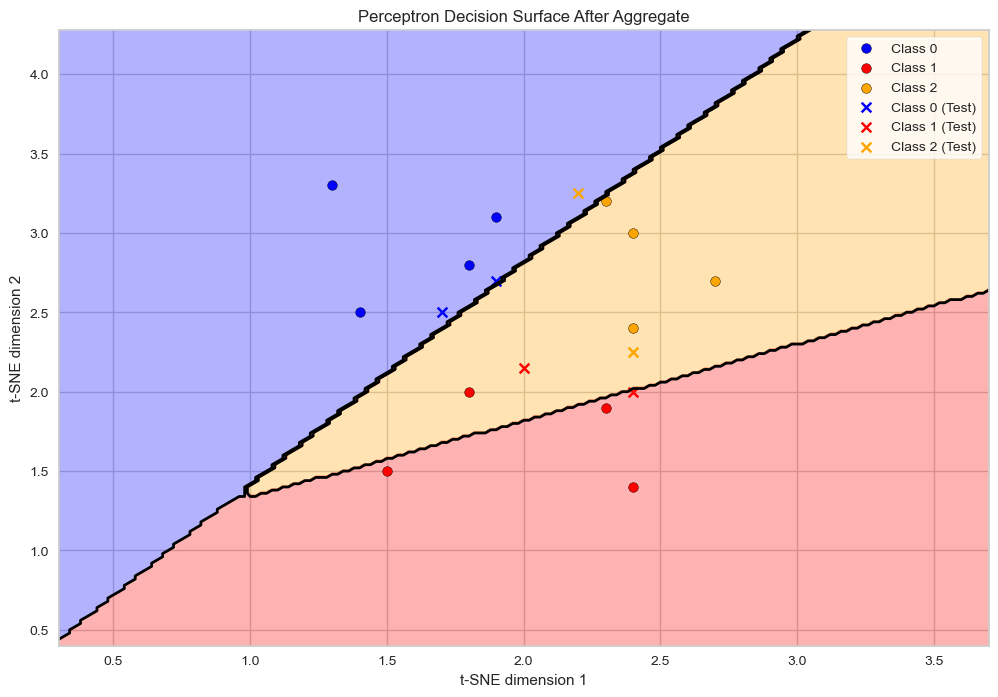

In [33]:
plot_decision_boundary_All_data([model_Per_0,model_Per_1,model_Per_3],X_Train, y_Train,X_Test,y_Test,'Perceptron Decision Surface After Aggregate')


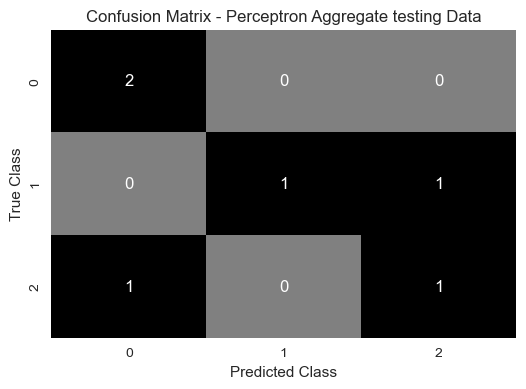

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2
           2       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.72      0.67      0.66         6
weighted avg       0.72      0.67      0.66         6



In [34]:
conf_matrix(y_Test, argmax_test_prc,"Perceptron Aggregate testing",True)

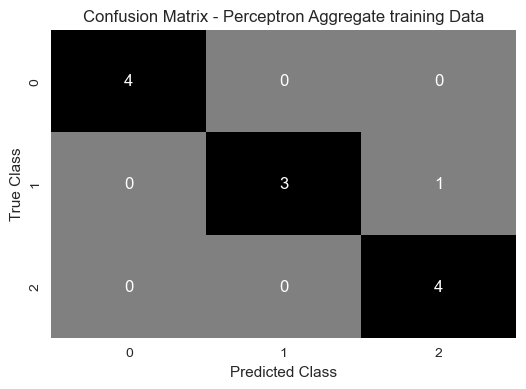

Accuracy:  0.9166666666666666


In [35]:
conf_matrix(y_Train, argmax_train_prc,"Perceptron Aggregate training")

## Test with another C=100

* Aggregate results from the one-vs-rest strategy for SVM 

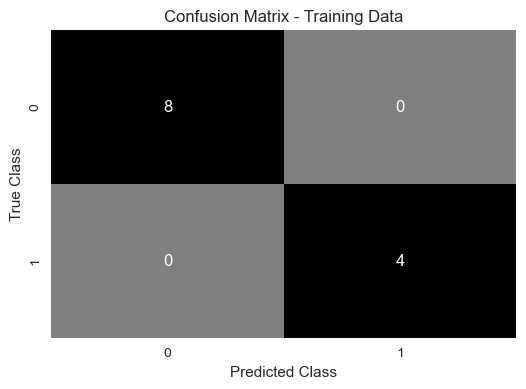

Accuracy:  1.0


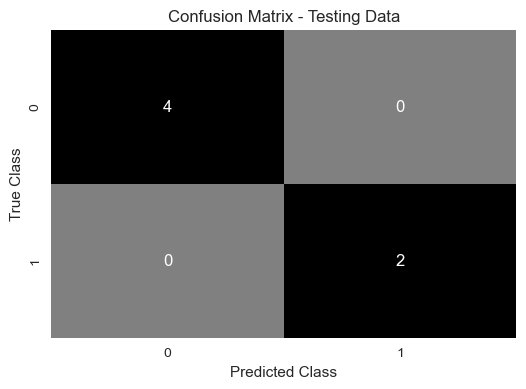

Accuracy:  1.0


In [36]:
train_0,test_0,model_0=One_Vs_rest(X_Train,y_Train,X_Test,y_Test,0,SVC(kernel='linear',C=40))

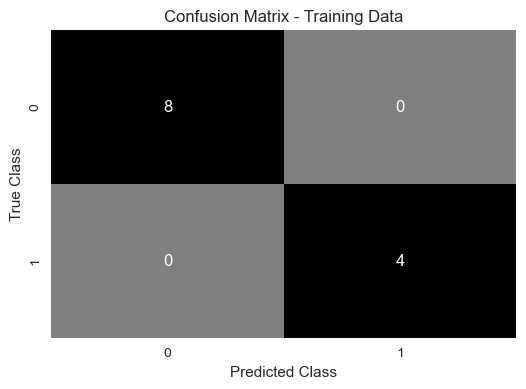

Accuracy:  1.0


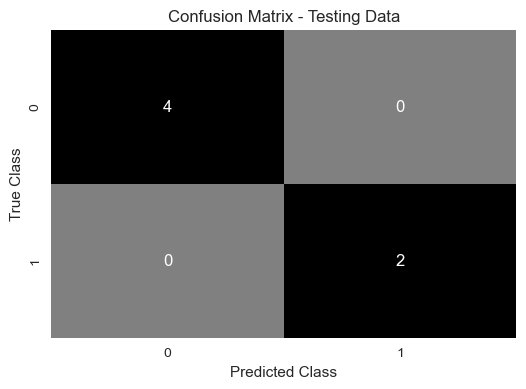

Accuracy:  1.0


In [37]:
train_1,test_1,model_1=One_Vs_rest(X_Train,y_Train,X_Test,y_Test,1,SVC(kernel='linear',C=40))

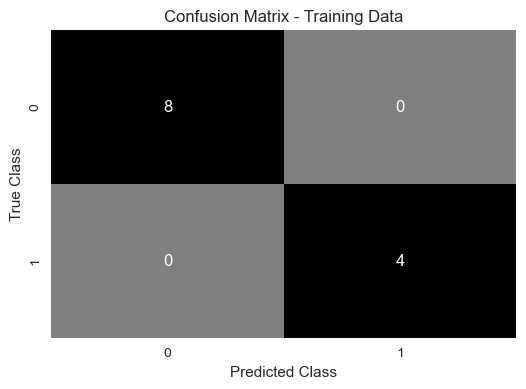

Accuracy:  1.0


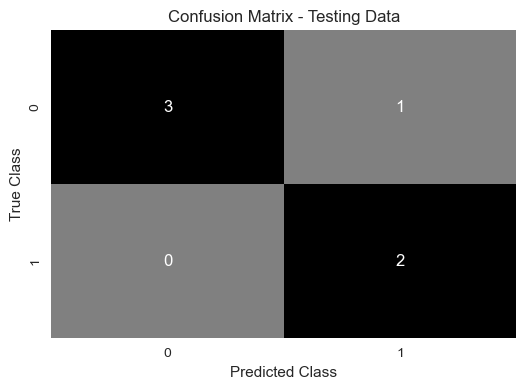

Accuracy:  0.8333333333333334


In [38]:
train_2,test_2,model_3=One_Vs_rest(X_Train,y_Train,X_Test,y_Test,2,SVC(kernel='linear',C=40))

In [39]:
argmax_train=concat(train_0,train_1,train_2)
argmax_test=concat(test_0,test_1,test_2)


C:\Users\DEBI\AppData\Local\Temp\ipykernel_11960\1601434719.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[idx, 0], x_test[idx, 1], c=color, label='Class ' + str(i) + ' (Test)', edgecolors='black', marker='x')


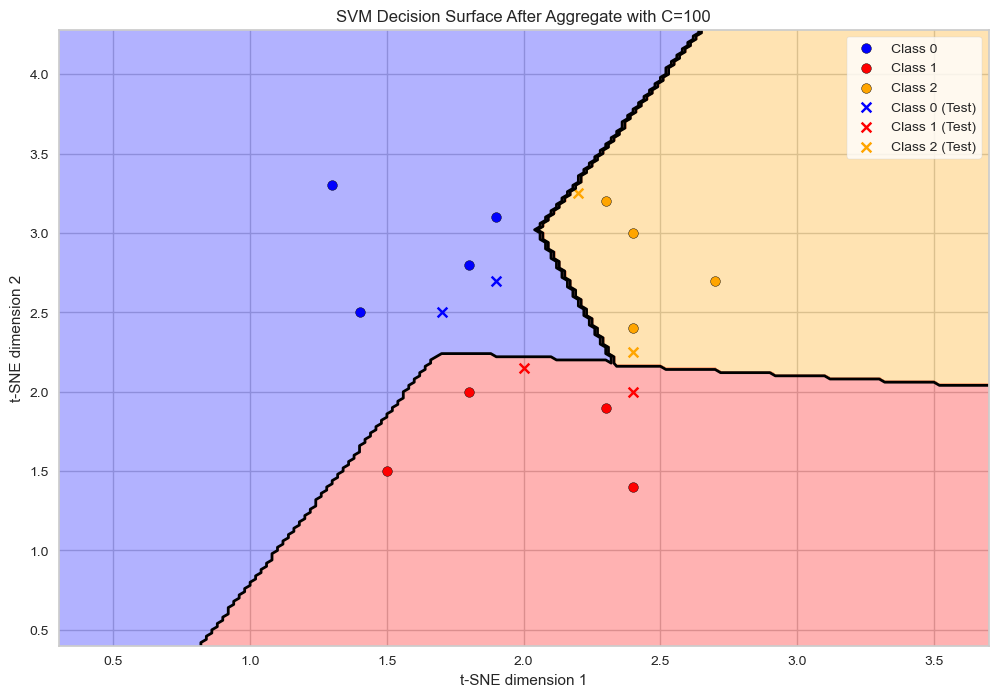

In [40]:
plot_decision_boundary_All_data([model_0,model_1,model_3],X_Train, y_Train,X_Test,y_Test,'SVM Decision Surface After Aggregate with C=100')


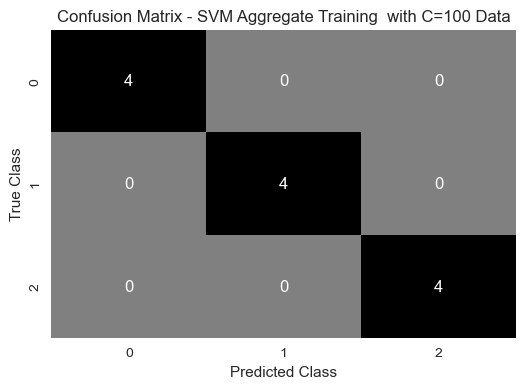

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [41]:
conf_matrix(y_Train, argmax_train,"SVM Aggregate Training  with C=100",True)

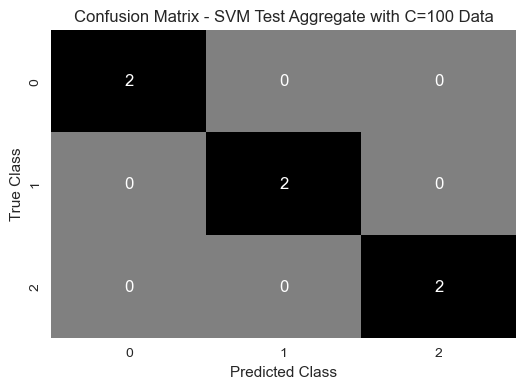

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [42]:
conf_matrix(y_Test, argmax_test,"SVM Test Aggregate with C=100",True)